In [1]:
import pandas as pd
import seaborn as sns
from functools import partial
import numpy as np


def getP(row, eps) :
    r = row["r"]
    return row[f"P_{r}_{eps}"]

def prob_unif_data(data, eps, pnscol):
    a = data[pnscol].apply(min)
    b = data[pnscol].apply(max)
    n = data[pnscol].apply(len)
    L = b - a
    
    num = (1 + (1 + 2*eps)**(2 - n) - 2 * (1+ eps) ** (2-n)) 
    den = (1 - L ** (n - 2) - (n - 2) * (1 - L) * L ** (n - 2))
    return num/den


def load(file, eps,llratio, pnscol, duplicate, fix):
    dt = pd.read_pickle(file).copy()
    #dt = dt[np.abs(dt.pns_l_emcc - dt.pns_u_emcc) > 0.02].copy()
    dt["r"] = dt[pnscol].apply(len)
    dt['duplicate'] = duplicate
    dt["fix"] = fix
    dt["pnss"] = dt[pnscol]
    dt["P"] = dt.apply(partial(getP, eps=eps), axis=1)
    dt["Punif"]=prob_unif_data(dt, eps, pnscol)
    dt["eps"] = str(eps)
    return dt[["modelFile", "r", "P", "duplicate", "fix", "pnss", "Punif", pnscol, "pns_l_emcc", "pns_u_emcc", "pns_l_ccve", "pns_u_ccve", "eps"]]
    

# exploration ($r_{max} = 100$)

In [42]:
data = pd.DataFrame([
    [True, True, 0.01, 0.98, "pns098", "s1d", "P_kl_1e8_s1d_100iter_fix098_diplicate_0.01.pickle"],
    [True, True, 0.05, 0.98,"pns098", "s1d", "P_kl_1e8_s1d_100iter_fix098_diplicate_0.05.pickle"],
    [True, True, 0.1, 0.98,"pns098",  "s1d", "P_kl_1e8_s1d_100iter_fix098_diplicate_0.1.pickle"],
    [False, True, 0.01, 0.98,"pns098", "s1b", "P_kl_1e8_s1d_100iter_fix098_0.01.pickle"],
    [False, True, 0.05, 0.98,"pns098", "s1b", "P_kl_1e8_s1d_100iter_fix098_0.05.pickle"],
    [False, True, 0.1, 0.98,"pns098", "s1b", "P_kl_1e8_s1d_100iter_fix098_0.1.pickle"],
], columns=['duplicate', "fix", "eps", "llratio","pnsCol", "dataset", "file"])

#d1 = load("P_kl_1e8_s1d_100iter_fix098_0.01.pickle", 0.01)
#d2 = load("P_kl_1e8_s1d_100iter_fix098_0.05.pickle", 0.05)
#d3 = load("P_kl_1e8_s1d_100iter_fix098_0.1.pickle", 0.1)

dt = pd.concat((
    load(d.file, d.eps, d.llratio, d.pnsCol, d.duplicate, d.fix).reset_index()
    for index, d in data.iterrows())).reset_index()

#dt = d1.merge(d2[["modelFile", "P0.05"]], on="modelFile").merge(d3[["modelFile", "P0.1"]], on="modelFile")

In [52]:
dt1 = dt[(dt.duplicate == False) & (dt.eps == "0.05")]
print(dt1.shape)
dt2 = dt1[(dt.P > 1.0)]

(199, 15)


/var/folders/gc/vwr0wlvs149fjgmddd29dpw40000gn/T/ipykernel_7477/3644433866.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dt2 = dt1[(dt.P > 1.0)]


In [83]:
from scipy.stats.distributions import beta 
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)


/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

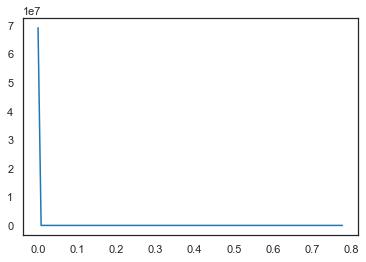

In [87]:
sns.lineplot(x, beta.pdf(x, a, b))

In [15]:
dt = dt[dt.P <= 1.0]
dt["eps dup"] = dt["eps"].astype(str) + " " + dt["duplicate"].astype(str)

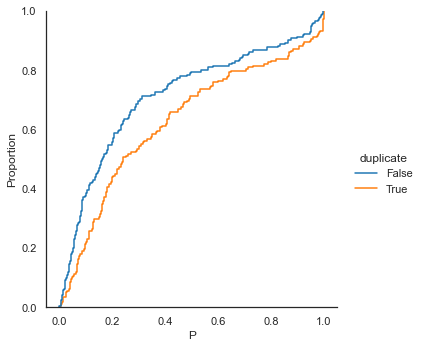

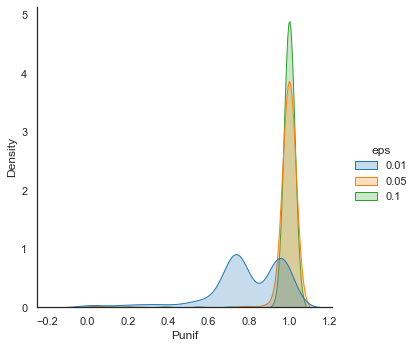

In [16]:
sns.set_theme(style="white", palette="tab10")
sns.displot(dt[dt.eps == "0.01"], x="P", hue="duplicate", kind="ecdf")
sns.displot(dt, x="Punif", hue="eps", kind="kde", fill=True)

# S1B duplicate exploration

In [20]:
d1d = load("P_kl_1e8_s1b_100iter_duplicated_0.01.pickle", 0.01)
d3d = load("P_kl_1e8_s1b_100iter_duplicated_0.1.pickle", 0.1)
dtd = pd.concat((d1d,d3d)).reset_index()
d3d['dup'] = True

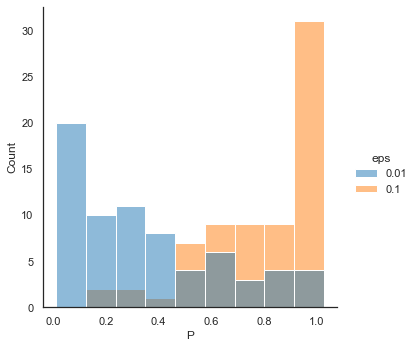

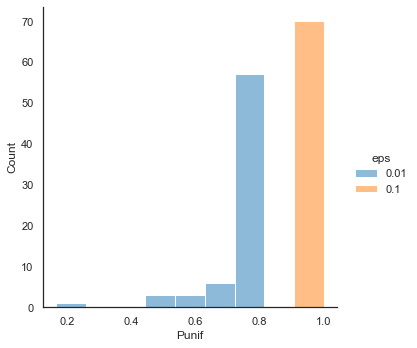

In [15]:
sns.set_theme(style="white", palette="tab10")
sns.displot(dtd, x="P", hue="eps",   fill=True)
sns.displot(dtd, x="Punif", hue="eps", fill=True)

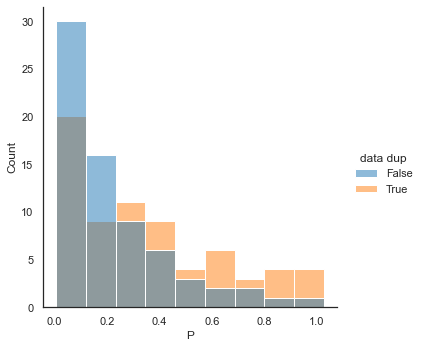

In [24]:
d1['data dup']=False
d1d['data dup']=True
sns.displot(pd.concat((d1, d1d)).reset_index(), x="P", hue="data dup")


# S1D exploration (no dup)

In [28]:
f1 = load("P_kl_1e8_s1d_100iter_0.01.pickle", 0.01)
f2 = load("P_kl_1e8_s1d_100iter_0.05.pickle", 0.05)
f3 = load("P_kl_1e8_s1d_100iter_0.1.pickle", 0.1)

ft = pd.concat((f1,f2,f3)).reset_index()
#dt = d1.merge(d2[["modelFile", "P0.05"]], on="modelFile").merge(d3[["modelFile", "P0.1"]], on="modelFile")

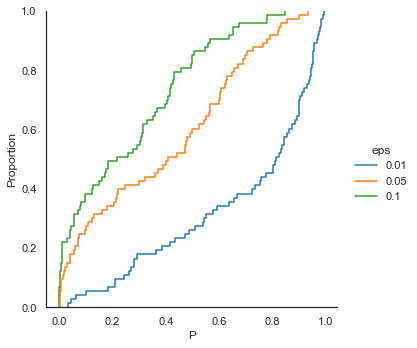

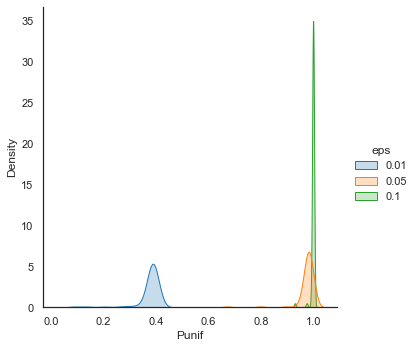

In [58]:
sns.set_theme(style="white", palette="tab10")
sns.displot(ft, x="P", hue="eps", kind="ecdf")
sns.displot(ft, x="Punif", hue="eps", kind="kde", fill=True)

<AxesSubplot:xlabel='r', ylabel='P'>

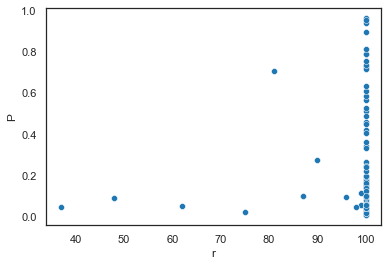

In [30]:
sns.scatterplot(y = f1.P, x = f1.r)

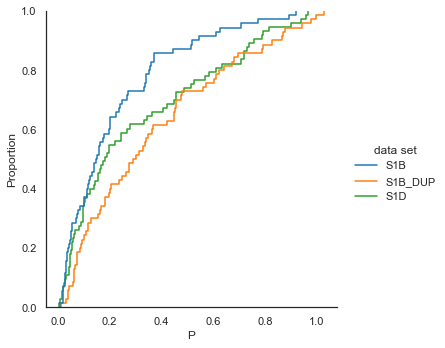

In [52]:
pltd = (d1, d1d, f1)
#pltd = (d3, d3d, f3)
pltd[0]['data set']="S1B"
pltd[1]['data set']="S1B_DUP"
pltd[2]['data set']="S1D"
sns.displot(pd.concat(pltd).reset_index(), x="P", kind="ecdf", hue="data set")


In [33]:
s = pd.read_pickle("pns_kl_1e8_s1d.pickle")
s = dt[(dt.eps=="0.1") & ( ~ dt.duplicate)].merge(s, on="modelFile")

/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pnss', ylabel='P'>

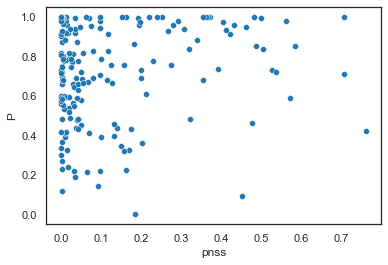

In [55]:
sns.scatterplot( s.pnss.apply(min),s.P)